# 1. Standard Scaling

`Standard scaling` is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ


In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [3]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


## **Standard Scaler**

In [4]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


## **MIN MAX Scaler**

In [5]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


## **MAX Absolute Scaler**

In [6]:
scaler = MaxAbsScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


## **Robust Scaler**

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---
# **Transformation**

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: ylabel='Count'>

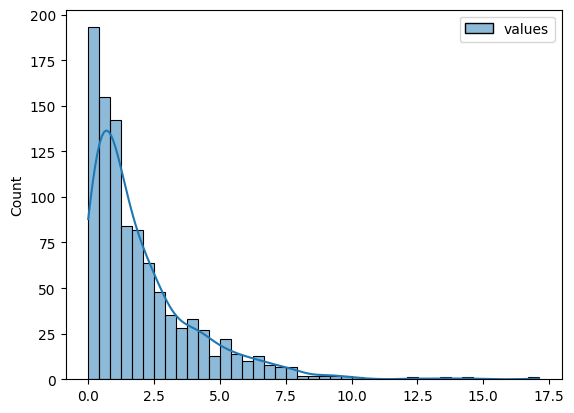

In [10]:
sns.histplot(df, kde=True)

In [14]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# for boxcox data must be postivie
df['box_cox'] = pt_boxcox.fit_transform(df[['values']] +1)
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['quantile'] = qt_normal.fit_transform(df[['values']])

In [15]:
df.head()

,values,box_cox,yeo_johnson,quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


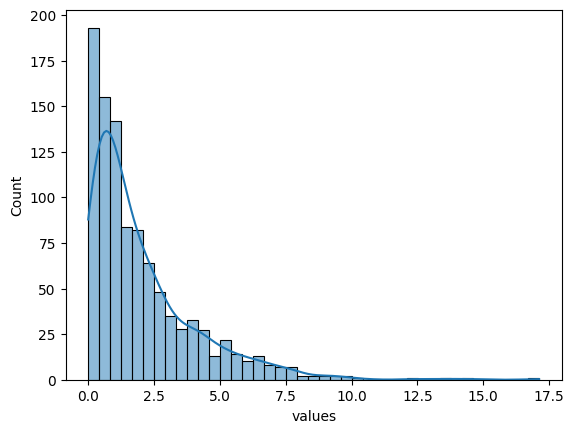

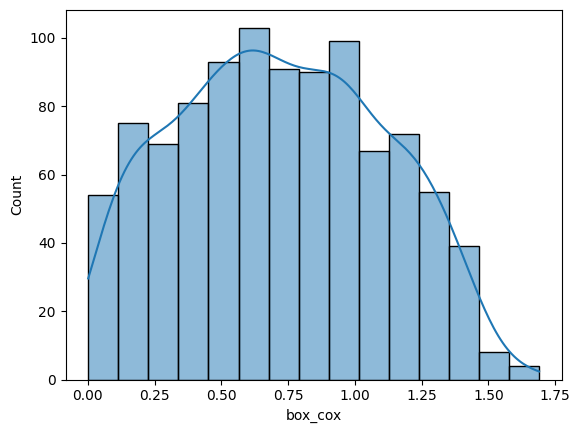

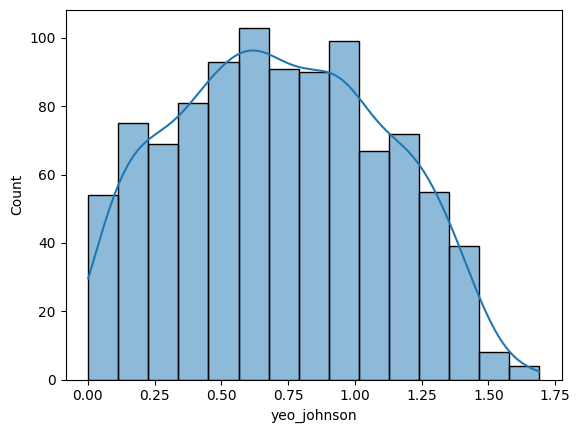

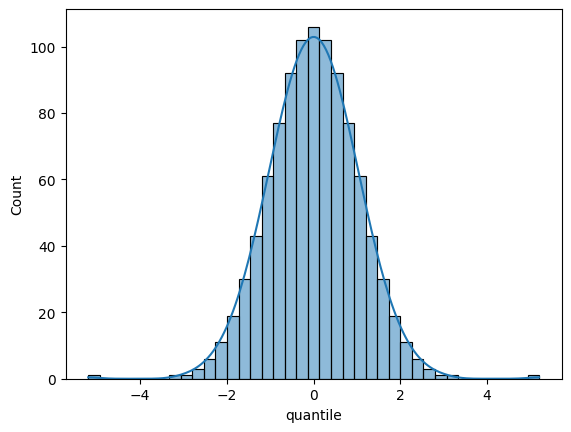

In [16]:
# create histplot for all columns using sns.hist

for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
## Normalization

### L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data.
The L2 norm is calculated as the square root of the sum of the squared vector values.

In [17]:
from sklearn.preprocessing import Normalizer

data = [[1, 1, 1,], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization:

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row.
The L1 norm is calculated as the sum of the absolute vector values.
Example:

In [18]:
from sklearn.preprocessing import Normalizer

data = [[1, 1, 1,], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


### Other normalizers
1. Z-score normalization
   1. Standard Scalar
2. Min-Max normalization
   1. Min-Max Scalar

# Log Transformation

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [12]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


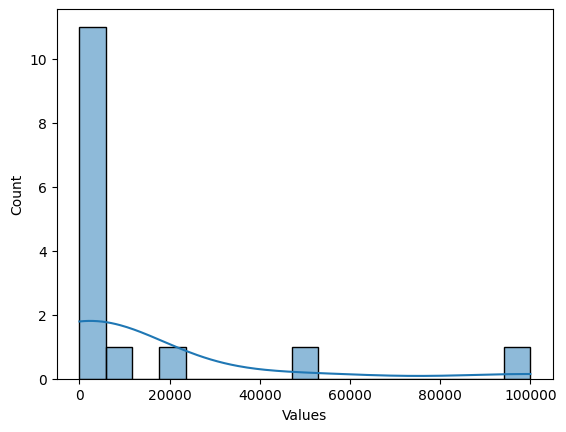

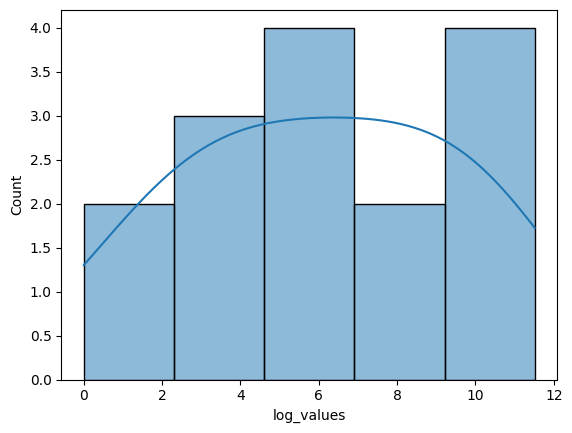

In [13]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

In [15]:
# to check whether the data is normally distributed or not
from scipy.stats import normaltest
stat, p = normaltest(df['log_values'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
    

Statistics=1.204, p=0.548
Data looks Gaussian (fail to reject H0)
